
<a href="https://colab.research.google.com/github/samwang1228/sinal-and-system/blob/main/.ipynb_checkpoints/select_stock-checkpoint.ipynb?hl=zh-tw">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import yfinance as yf

#X= pd.read_csv('AAPL.csv')

def 策略01(股票名稱= 'AAPL'):
    
    ticker= yf.Ticker(股票名稱)
    X= ticker.history(period= 'max')

    天天買所花的錢= X['Close'].sum()
    最後1天的價錢= X['Close'].iloc[-1]
    所有的股數= len(X['Close'])
    在最後1天的賣出的總價錢= 最後1天的價錢 * 所有的股數
    錢變成的倍數= 在最後1天的賣出的總價錢/天天買所花的錢

    return 錢變成的倍數

def 策略02(股票名稱= 'AAPL'):
    
    ticker= yf.Ticker(股票名稱)
    X= ticker.history(period= 'max')

    天天買所花的錢= X['Close'].sum()
    第1天所有的資金= 天天買所花的錢
    第1天的價錢= X['Close'].iloc[0]
    
    最後1天的價錢= X['Close'].iloc[-1]
    #所有的股數= len(X['Close'])
    策略2所有的股數= 第1天所有的資金/第1天的價錢
    
    在最後1天的賣出的總價錢= 最後1天的價錢 * 策略2所有的股數 #所有的股數
    錢變成的倍數= 在最後1天的賣出的總價錢/第1天所有的資金 #天天買所花的錢

    return 錢變成的倍數




# 美股台股比較

In [2]:
股票列表=[
    'AAPL',
    'MSFT',
    'GOOGL',
    'AMZN',
    'FB',
    '2330.tw']


for 股票 in 股票列表:
    報酬= 策略01(股票)
    print(f'股票代號{股票}, 到今日報酬{報酬}')

股票代號AAPL, 到今日報酬11.86184506469494
股票代號MSFT, 到今日報酬8.439347648867296
股票代號GOOGL, 到今日報酬4.082711406610857
股票代號AMZN, 到今日報酬7.067736163577757
股票代號FB, 到今日報酬2.5157671925606597
股票代號2330.tw, 到今日報酬6.014310245905568


In [3]:
for 股票 in 股票列表:
    報酬= 策略02(股票)
    print(f'股票代碼{股票}, 到今天錢的倍數{報酬}')

股票代碼AAPL, 到今天錢的倍數1251.5294759623528
股票代碼MSFT, 到今天錢的倍數4175.399178855841
股票代碼GOOGL, 到今天錢的倍數48.48903385654416
股票代碼AMZN, 到今天錢的倍數1710.459489894228
股票代碼FB, 到今天錢的倍數8.69631167763363
股票代碼2330.tw, 到今天錢的倍數16.49276802433992


# 美股大勝

In [29]:
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns

#time
import datetime as datetime

#talib
import talib

# 分析台積電(2330)

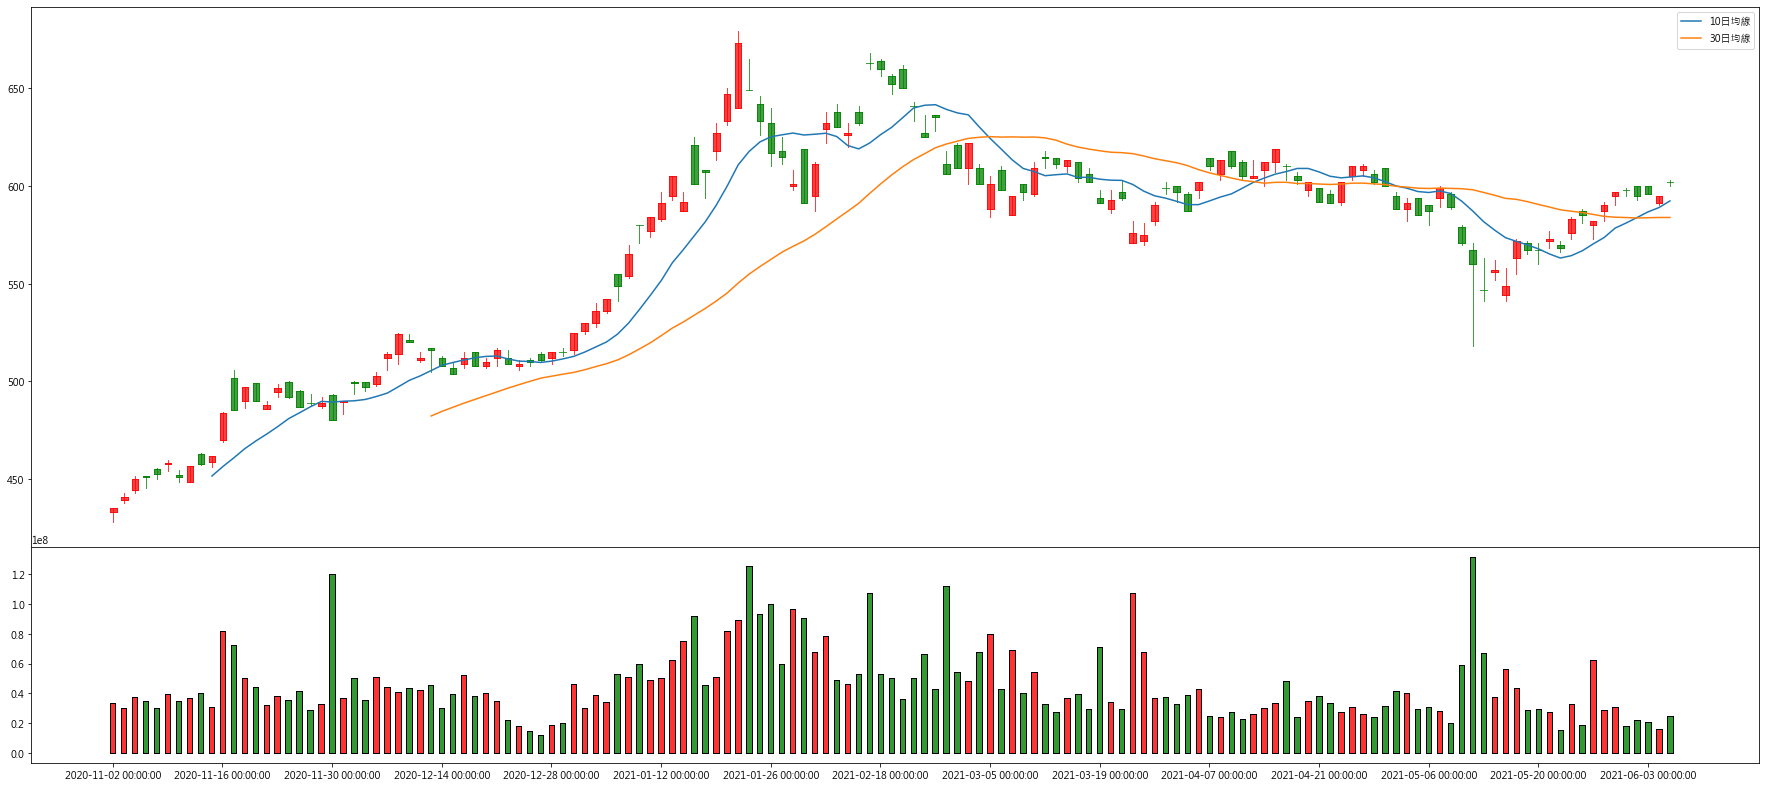

In [5]:
start = datetime.datetime(2020,11,1) #from datatime
# start = datetime.datetime(2020,9,1)
#使用pandas_datareader抓取某個股票，這邊使用台積電(2330)
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start)

sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)

fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])
ax.plot(grid='True')
#使用 set_xticklabels來畫股票棒子 from talib
ax.set_xticks(range(0, len(df_2330.index), 10))
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線') #藍色
ax.plot(sma_30, label='30日均線') #橘色

#成交量
mpf.volume_overlay(ax2, df_2330['Open'], df_2330['Close'], df_2330['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2330.index), 10))
ax2.set_xticklabels(df_2330.index[::10])

ax.legend();

In [6]:
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start)
df_2330

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,65.000000,64.000000,65.000000,64.900002,39407000.0,43.658260
2010-01-05,65.099998,63.900002,65.000000,64.500000,37138000.0,43.389179
2010-01-06,64.900002,63.700001,64.500000,64.900002,49261000.0,43.658260
2010-01-07,65.000000,64.199997,64.900002,64.199997,42134000.0,43.187370
2010-01-08,64.300003,63.500000,63.500000,64.000000,46076000.0,43.052830
...,...,...,...,...,...,...
2021-06-01,599.000000,595.000000,598.000000,598.000000,17818326.0,598.000000
2021-06-02,600.000000,593.000000,600.000000,595.000000,21872755.0,595.000000
2021-06-03,600.000000,596.000000,600.000000,596.000000,21077164.0,596.000000


In [28]:

# def makemoney(stockName):
#     minValue=[]
#     for year in range(10):
#         for month in range(1,13):
#             start = datetime.datetime(2010,month,1) #from datatime
#             end = datetime.datetime(2010,month,28)
#             select=pdr.DataReader('2330.TW', 'yahoo', start=start,end=end)
#             minValue.append(select['Low'].min())        
#     return minValue
# start = datetime.datetime(2010,11,1) #from datatime
name='2330.TW'
# makemoney(name)
# makemoney(name)
#  for year in range(10):
#         for month in range(12):
#             start = datetime.datetime(2010,1,1) #from datatime
#             end = datetime.datetime(2010,7,28)
#             select=pdr.DataReader(stockName, 'yahoo', start=start,end=end)
#             print(select)

# makemoney(name)

In [9]:
# print(minValue)  
year=2016
a=[]
start = datetime.datetime(year,1,1) #from datatime
end = datetime.datetime(year,7,28)
test=pdr.DataReader(name,'yahoo',start=start,end=end)
a.append(test['Low'].min())
a

[130.5]

# 作業開始

In [23]:
minValue=np.zeros((10,12))
mySum=0
for i in range(1,13):
    mySum+=1000*28
    
for year in range(1,3):
    for month in range(1,13):
        start = datetime.datetime(2010+year,month,1) #from datatime
        end = datetime.datetime(2010+year,month,28)
        select=pdr.DataReader('2330.TW', 'yahoo', start=start,end=end)
        minValue[year-1][month-1]=select['Low'].min()
minValue

array([[69.59999847, 69.90000153, 65.69999695, 68.        , 73.        ,
        71.59999847, 68.5       , 62.20000076, 65.90000153, 68.09999847,
        71.30000305, 72.        ],
       [69.80000305, 75.59999847, 78.30000305, 81.5       , 78.09999847,
        76.09999847, 73.80000305, 79.19999695, 81.        , 84.5       ,
        87.69999695, 94.59999847],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  

In [24]:
for year in range(3,5):
    for month in range(1,13):
        start = datetime.datetime(2010+year,month,1) #from datatime
        end = datetime.datetime(2010+year,month,28)
        select=pdr.DataReader('2330.TW', 'yahoo', start=start,end=end)
        minValue[year-1][month-1]=select['Low'].min()
        
minValue

array([[ 69.59999847,  69.90000153,  65.69999695,  68.        ,
         73.        ,  71.59999847,  68.5       ,  62.20000076,
         65.90000153,  68.09999847,  71.30000305,  72.        ],
       [ 69.80000305,  75.59999847,  78.30000305,  81.5       ,
         78.09999847,  76.09999847,  73.80000305,  79.19999695,
         81.        ,  84.5       ,  87.69999695,  94.59999847],
       [ 97.09999847, 100.5       ,  98.        ,  97.5       ,
        108.        , 100.        ,  96.90000153,  92.90000153,
         99.59999847, 100.5       , 100.        , 101.        ],
       [100.5       , 100.5       , 106.5       , 116.5       ,
        116.        , 120.        , 121.        , 119.        ,
        120.5       , 118.        , 130.5       , 130.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,

In [25]:
for year in range(5,7):
    for month in range(1,13):
        start = datetime.datetime(2010+year,month,1) #from datatime
        end = datetime.datetime(2010+year,month,28)
        select=pdr.DataReader('2330.TW', 'yahoo', start=start,end=end)
        minValue[year-1][month-1]=select['Low'].min()
minValue

array([[ 69.59999847,  69.90000153,  65.69999695,  68.        ,
         73.        ,  71.59999847,  68.5       ,  62.20000076,
         65.90000153,  68.09999847,  71.30000305,  72.        ],
       [ 69.80000305,  75.59999847,  78.30000305,  81.5       ,
         78.09999847,  76.09999847,  73.80000305,  79.19999695,
         81.        ,  84.5       ,  87.69999695,  94.59999847],
       [ 97.09999847, 100.5       ,  98.        ,  97.5       ,
        108.        , 100.        ,  96.90000153,  92.90000153,
         99.59999847, 100.5       , 100.        , 101.        ],
       [100.5       , 100.5       , 106.5       , 116.5       ,
        116.        , 120.        , 121.        , 119.        ,
        120.5       , 118.        , 130.5       , 130.        ],
       [130.        , 140.5       , 142.5       , 141.5       ,
        144.5       , 138.        , 134.        , 112.5       ,
        122.        , 129.5       , 134.        , 137.5       ],
       [130.5       , 141.5       ,

In [26]:
for year in range(7,9):
    for month in range(1,13):
        start = datetime.datetime(2010+year,month,1) #from datatime
        end = datetime.datetime(2010+year,month,28)
        select=pdr.DataReader('2330.TW', 'yahoo', start=start,end=end)
        minValue[year-1][month-1]=select['Low'].min()
        
minValue

array([[ 69.59999847,  69.90000153,  65.69999695,  68.        ,
         73.        ,  71.59999847,  68.5       ,  62.20000076,
         65.90000153,  68.09999847,  71.30000305,  72.        ],
       [ 69.80000305,  75.59999847,  78.30000305,  81.5       ,
         78.09999847,  76.09999847,  73.80000305,  79.19999695,
         81.        ,  84.5       ,  87.69999695,  94.59999847],
       [ 97.09999847, 100.5       ,  98.        ,  97.5       ,
        108.        , 100.        ,  96.90000153,  92.90000153,
         99.59999847, 100.5       , 100.        , 101.        ],
       [100.5       , 100.5       , 106.5       , 116.5       ,
        116.        , 120.        , 121.        , 119.        ,
        120.5       , 118.        , 130.5       , 130.        ],
       [130.        , 140.5       , 142.5       , 141.5       ,
        144.5       , 138.        , 134.        , 112.5       ,
        122.        , 129.5       , 134.        , 137.5       ],
       [130.5       , 141.5       ,

In [27]:
for year in range(9,11):
    for month in range(1,13):
        start = datetime.datetime(2010+year,month,1) #from datatime
        end = datetime.datetime(2010+year,month,28)
        select=pdr.DataReader('2330.TW', 'yahoo', start=start,end=end)
        minValue[year-1][month-1]=select['Low'].min()
        
minValue

array([[ 69.59999847,  69.90000153,  65.69999695,  68.        ,
         73.        ,  71.59999847,  68.5       ,  62.20000076,
         65.90000153,  68.09999847,  71.30000305,  72.        ],
       [ 69.80000305,  75.59999847,  78.30000305,  81.5       ,
         78.09999847,  76.09999847,  73.80000305,  79.19999695,
         81.        ,  84.5       ,  87.69999695,  94.59999847],
       [ 97.09999847, 100.5       ,  98.        ,  97.5       ,
        108.        , 100.        ,  96.90000153,  92.90000153,
         99.59999847, 100.5       , 100.        , 101.        ],
       [100.5       , 100.5       , 106.5       , 116.5       ,
        116.        , 120.        , 121.        , 119.        ,
        120.5       , 118.        , 130.5       , 130.        ],
       [130.        , 140.5       , 142.5       , 141.5       ,
        144.5       , 138.        , 134.        , 112.5       ,
        122.        , 129.5       , 134.        , 137.5       ],
       [130.5       , 141.5       ,

In [44]:
mySum=0
myStock=0
finalMoney=0
for i in range(0,8):
    mySum+=1000*28
myStock/=minValue[0][7]
mySum=0
for i in range(-4,7):
    mySum+=1000*28
myStock+=mySum/minValue[1][6]

mySum=0
for i in range(-5,8):
    mySum+=1000*28
myStock+=mySum/minValue[2][7]

mySum=0
for i in range(-4,10):
    mySum+=1000*28
myStock+=mySum/minValue[3][9]

mySum=0
for i in range(-2,13):
    mySum+=1000*28
myStock+=mySum/minValue[5][0]

mySum=0
for i in range(1,13):
    mySum+=1000*28
myStock+=mySum/minValue[6][0]
mySum=0
for i in range(1,13):
    mySum+=1000*28
myStock+=mySum/minValue[7][0]
mySum=0
for i in range(1,6):
    mySum+=1000*28
myStock+=mySum/minValue[8][5]
mySum=0
for i in range(-5,6):
    mySum+=1000*28
myStock+=mySum/minValue[9][5]
finalMoney=myStock*483.5+1000*28*6
finalMoney

9655780.340491356

In [39]:
originMoney=0
for i in range(10,11):
    for j in range(1,13):
        originMoney+=1000*28
originMoney

336000

In [49]:
print(f'你的獲利為{finalMoney/originMoney*100}% 最後經額為{finalMoney} 原始金額為{originMoney}')

你的獲利為2873.744148955761% 最後經額為9655780.340491356 原始金額為336000
